# Sentiment Analysis Using Bag of Words

In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import copy , math 
from bs4 import BeautifulSoup
import re
import nltk 
import spacy
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob 
from textblob import Word 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\babul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Twitter_Data.csv')
df.sample(7)

,clean_text,category
96332,the power modi again the manifesto language i...,1.0
128448,this really serious one hand the youth our nat...,-1.0
51,not just healing touch india need surgery remo...,0.0
60837,when modi left everyone guessing via news9 lat...,1.0
145849,modi rahul campaign can marginalise tts give e...,0.0
131639,rumours also say none the indians died with th...,1.0
94312,oxford dictionary added more vocabulary that m...,1.0


In [3]:
print(f'the shape of dataset is : {df.shape}')

print(f'the columns are : {df.columns}')

the shape of dataset is : (162980, 2)
the columns are : Index(['clean_text', 'category'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [5]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [6]:
for i in range(5):
    print(f"{i + 1} : {df['clean_text'][i]} -> {df['category'][i]}")

1 : when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples -> -1.0
2 : talk all the nonsense and continue all the drama will vote for modi  -> 0.0
3 : what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax -> 1.0
4 : asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars -> 1.0
5 : answer who among these the most powerful world leader today trump putin modi may  -> 1.0


In [7]:
# Missing rows removed 

df.dropna(inplace=True)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [8]:
# Creating a copy of dataframe df , named new_df which contains only 100000 examples

new_dataframe_class_0 = df[df['category'] == -1].head(500)
new_dataframe_class_1 = df[df['category'] == 1].head(500)

# Concatenate the two subsets to create the final DataFrame with equal counts of both classes
new_df = pd.concat([new_dataframe_class_0, new_dataframe_class_1])

# Shuffle the rows to randomize the order
new_df = new_df.sample(frac=1).reset_index(drop=True)
new_df



,clean_text,category
0,you know manmohan singh oxford graduate and ob...,-1.0
1,can you please give writing that modi comes po...,1.0
2,cbi standoff after modi won election was well ...,1.0
3,must read final days modi government adani pro...,1.0
4,mai atal bihari avinash singh gandhi order det...,1.0
...,...,...
995,bjp struggles find candidates west bengal graf...,-1.0
996,modi has crippled economy destroyed jobs far f...,1.0
997,supreme court notice cbi disproportionate asse...,-1.0
998,tulsi gabbard rejected interviews with tyt but...,1.0


In [9]:
# Assuming your DataFrame is named df
new_df['category'] = new_df['category'].replace(-1, 0)

new_df


,clean_text,category
0,you know manmohan singh oxford graduate and ob...,0.0
1,can you please give writing that modi comes po...,1.0
2,cbi standoff after modi won election was well ...,1.0
3,must read final days modi government adani pro...,1.0
4,mai atal bihari avinash singh gandhi order det...,1.0
...,...,...
995,bjp struggles find candidates west bengal graf...,0.0
996,modi has crippled economy destroyed jobs far f...,1.0
997,supreme court notice cbi disproportionate asse...,0.0
998,tulsi gabbard rejected interviews with tyt but...,1.0


In [10]:
# Removing HTML strips 
def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

#removing the square brackets 

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]','', text)

#removing the noisy text 

def denoise_text(text):
    text = strip_html(text)
    text = remove_square_brackets(text)
    return text

#Applying the function 

new_df['clean_text'] = new_df['clean_text'].apply(denoise_text)

new_df['clean_text']

0      you know manmohan singh oxford graduate and ob...
1      can you please give writing that modi comes po...
2      cbi standoff after modi won election was well ...
3      must read final days modi government adani pro...
4      mai atal bihari avinash singh gandhi order det...
                             ...                        
995    bjp struggles find candidates west bengal graf...
996    modi has crippled economy destroyed jobs far f...
997    supreme court notice cbi disproportionate asse...
998    tulsi gabbard rejected interviews with tyt but...
999    and think modi representative hindus sorry der...
Name: clean_text, Length: 1000, dtype: object

In [34]:


def remove_special_character(text, remove_digits=True):
    if remove_digits:
        pattern = r'[^a-zA-Z\s]'  # Remove digits as well
    else:
        pattern = r'[^a-zA-Z\s\d]'  # Keep digits
    text = re.sub(pattern, '', text)
    return text 

# Applying the function to the 'clean_text' column
new_df['clean_text'] = new_df['clean_text'].apply(remove_special_character)

# Printing the cleaned DataFrame
print(new_df['clean_text'])


0      know manmohan singh oxford graduat obama seek ...
1      pleas give write modi come power elect conduct...
2      cbi standoff modi elect well known asthana wou...
3      must read final day modi govern adani project ...
4      mai atal bihari avinash singh gandhi order det...
                             ...                        
995    bjp struggl find candid west bengal graffiti s...
996    modi crippl economi destroy job far creat new ...
997    suprem court notic cbi disproportion asset cas...
998    tulsi gabbard reject interview tyt chat tucker...
999    think modi repres hindu sorri der differ norma...
Name: clean_text, Length: 1000, dtype: object


In [35]:
class SpaCyTokenizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")

    def tokenize(self, text):
        doc = self.nlp(text)
        return [token.text for token in doc]

In [36]:

# Setting English StopWords 

default_stopwords = set(stopwords.words('english'))

custom_stopwords = set(['not', 'no', 'against', 'nor'])

stopword_list = default_stopwords - custom_stopwords

print(stopword_list)

tokenizer = SpaCyTokenizer()

def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]

    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text 

new_df['clean_text'] = new_df['clean_text'].apply(remove_stopwords)

new_df['clean_text']


{'until', 'now', 'their', 'further', 'too', 'doing', 'some', 'where', 'up', 'any', 'these', 'wasn', "needn't", 'shan', 'his', "that'll", 'mightn', 'ain', 'can', 'such', 'wouldn', 'whom', "you'll", 'is', 'under', 'don', 'yourselves', 'them', 'what', 'have', 'do', "didn't", "isn't", "mustn't", 'how', 'will', 'couldn', 'herself', 'myself', 'all', 'himself', 'off', 'in', 'if', 'with', 'o', 'over', 'other', 'haven', 'an', 'both', "mightn't", 'my', 'of', "don't", 'during', "shouldn't", 'own', 'does', 'than', 'hers', 'needn', 'below', 'our', 'who', 'being', 'when', 'doesn', 'having', 'for', 'are', 'has', 'and', "aren't", "couldn't", 'but', 'between', "you've", 'should', 'me', 'y', 'was', 'we', 'about', 'as', "it's", 'itself', 'out', 'd', 'weren', 'it', 'there', "doesn't", 'above', 'the', 'mustn', 'be', 'm', "hadn't", 'after', 'or', 'were', 'again', 'didn', 'your', "hasn't", "she's", 'she', 'him', 'same', "won't", "you'd", "wouldn't", 'll', 'they', 'by', 'ourselves', 'only', 'had', 'most', 'ou

0      know manmohan singh oxford graduat obama seek ...
1      pleas give write modi come power elect conduct...
2      cbi standoff modi elect well known asthana wou...
3      must read final day modi govern adani project ...
4      mai atal bihari avinash singh gandhi order det...
                             ...                        
995    bjp struggl find candid west bengal graffiti s...
996    modi crippl economi destroy job far creat new ...
997    suprem court notic cbi disproportion asset cas...
998    tulsi gabbard reject interview tyt chat tucker...
999    think modi repres hindu sorri der differ norma...
Name: clean_text, Length: 1000, dtype: object

In [37]:
# Stemming the text 
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

new_df['clean_text'] = new_df['clean_text'].apply(simple_stemmer)

new_df['clean_text']

0      know manmohan singh oxford graduat obama seek ...
1      plea give write modi come power elect conduct ...
2      cbi standoff modi elect well known asthana wou...
3      must read final day modi govern adani project ...
4      mai atal bihari avinash singh gandhi order det...
                             ...                        
995    bjp struggl find candid west bengal graffiti s...
996    modi crippl economi destroy job far creat new ...
997    suprem court notic cbi disproport asset case a...
998    tulsi gabbard reject interview tyt chat tucker...
999    think modi repr hindu sorri der differ normal ...
Name: clean_text, Length: 1000, dtype: object

# Converting the column of clean_text into a single string

In [38]:

concatenated_string = new_df['clean_text'].str.cat(sep=' ')

print(concatenated_string)

know manmohan singh oxford graduat obama seek help america depress call scam want list scam modi thu far sad see even young kid like support modi india hard time plea give write modi come power elect conduct good leav countri forev polit would alreadi end elect cbi standoff modi elect well known asthana would join cbi say former gujarat top cop huffpost india must read final day modi govern adani project jharkhand becom india first power sector sez via mai atal bihari avinash singh gandhi order deta mechokidar narend modi may morn join kre thound per day call inform modi boast digit wait deposit cash sbi mahim deposit th mar butch not honour old format appli beech book may take week deposit ppf mar condol loss live due bu accid maharashtra modi keep win till gon na call third term third reich hunainti mulsim kill india kashmir human awaken gov taken action alreadi nt worri not modi sarkar bjp major role destabili countri break harmoni ignor fact bjp modi take credit give credit divid p

# Splitting the the string into list of unique words

In [39]:

def stirng_to_unique_words(text):
    
    words = text.split()

    unique_words = set(words)        
    
    unique_word_list = list(unique_words)

    return unique_word_list

unique_word_list = stirng_to_unique_words(concatenated_string)

print(unique_word_list)

length_list = len(unique_word_list)
print(length_list)

['lac', 'hatedont', 'reader', 'glorifi', 'shatri', 'incub', 'today', 'nobodi', 'dalakar', 'simpli', 'reason', 'swaraj', 'tara', 'topic', 'mukherj', 'dharmic', 'sukhoi', 'level', 'dhyan', 'creat', 'veil', 'sha', 'machy', 'dutydo', 'hve', 'fare', 'bother', 'akhtar', 'constabl', 'shall', 'gate', 'poverti', 'proceed', 'racist', 'huffpost', 'spectrum', 'stage', 'mouth', 'chowdhari', 'contestor', 'organi', 'cent', 'soo', 'miya', 'pace', 'likewi', 'saint', 'rozi', 'road', 'salesman', 'place', 'public', 'visibl', 'nvr', 'histrion', 'lyric', 'porn', 'youcongress', 'bash', 'reallywhat', 'challengescondemnsabu', 'fakendra', 'centuri', 'sensit', 'grow', 'phrase', 'telugu', 'base', 'surnam', 'deserv', 'region', 'fix', 'humour', 'strengthen', 'rotfl', 'provid', 'aaega', 'sli', 'mosqu', 'ill', 'ayushman', 'ball', 'expec', 'celeb', 'ct', 'sahib', 'soor', 'vasool', 'msme', 'struggl', 'object', 'crude', 'debt', 'women', 'lifeschool', 'upcom', 'rao', 'ambedkar', 'drink', 'preview', 'legend', 'raj', 'dead

# Making Word Cloud for Different Sentiments

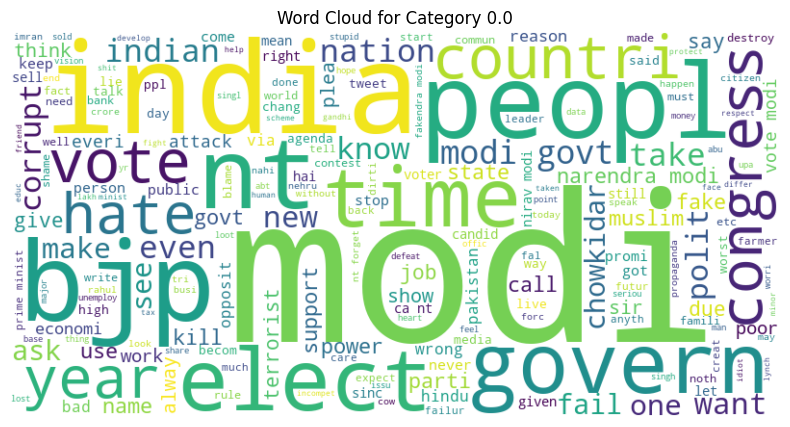

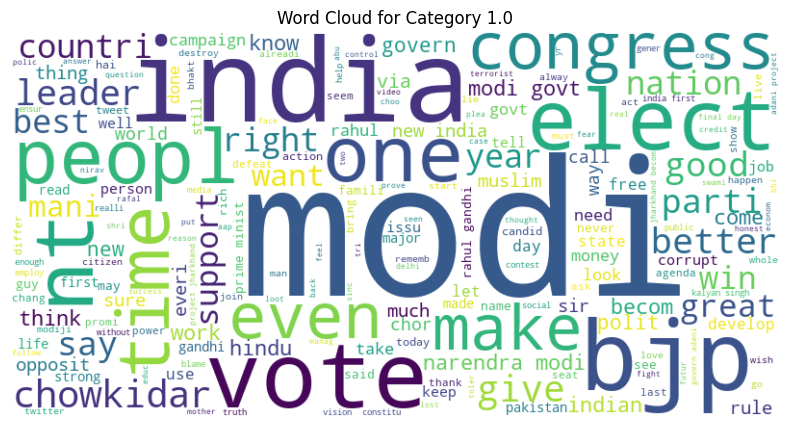

In [40]:
def generate_wordcloud(category):
    text = ' '.join(new_df[new_df['category'] == category]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category {category}')
    plt.axis('off')
    plt.show()

# Generate word cloud for each category
unique_categories = new_df['category'].unique()
for category in unique_categories:
    generate_wordcloud(category)

# Splitting the dataset into Train and Test Sets

In [41]:
X = new_df['clean_text']

Y = new_df['category']

X_train = X[:800]
X_test = X[800:]

Y_train = Y[:800]
Y_test = Y[800:]


In [42]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1000,) (800,) (200,)
(1000,) (800,) (200,)


In [43]:
print("X_train")
print(X_train)

print("Y_train")
print(Y_train)

X_train
0      know manmohan singh oxford graduat obama seek ...
1      plea give write modi come power elect conduct ...
2      cbi standoff modi elect well known asthana wou...
3      must read final day modi govern adani project ...
4      mai atal bihari avinash singh gandhi order det...
                             ...                        
795    insolv bankruptci code second import econom re...
796    chowkidar new symbol uniti ident new india tha...
797    thought modi becam thing becom betteri complai...
798                    actual promot modi govt good work
799    look pass road around har pauri park lane side...
Name: clean_text, Length: 800, dtype: object
Y_train
0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
795    1.0
796    1.0
797    0.0
798    1.0
799    0.0
Name: category, Length: 800, dtype: float64


# Define a function to create binary arrays for each tweet

Here, we have made a binary array (contains 0 or 1) for each tweet. If the word in tweet is present in the unique word, we mapped it as '1' and If not present, we mapped it as '0'.

In [46]:

def create_binary_arrays(tweets, unique_words):
    stemmer = PorterStemmer()
    binary_arrays = []

    for tweet in tweets:
        binary_array = [1 if stemmer.stem(word) in tweet else 0 for word in unique_words]
        binary_arrays.append(binary_array)

    return binary_arrays


unique_words = unique_word_list

binary_arrays_for_train = create_binary_arrays(X_train, unique_words)

binary_arrays_for_test = create_binary_arrays(X_test, unique_words)

# Create a dataframe with the binary arrays for each word
binary_train_df = pd.DataFrame(binary_arrays_for_train, columns=unique_words)

# Create a dataframe with the binary arrays for each word
binary_test_df = pd.DataFrame(binary_arrays_for_test, columns=unique_words)


# Saving the binary dataframes to avoid computation again

In [47]:
binary_train_df.to_csv("trained_sparse_matrix.csv")
binary_test_df.to_csv("test_sparse_matrix.csv")

In [44]:
binary_train_df = pd.read_csv("trained_sparse_matrix.csv")
binary_test_df = pd.read_csv("test_sparse_matrix.csv")

In [48]:
# Print the row of binary_train_df
print(binary_train_df.iloc[0].value_counts())
print("For Test Dataset")
print(binary_test_df.iloc[0].value_counts())

0
0    4220
1      45
Name: count, dtype: int64
For Test Dataset
0
0    4215
1      50
Name: count, dtype: int64


# Converting binary_train_df and binary_test_df into numpy arrays 

In [49]:

X_train_arrays = binary_train_df.values

X_test_arrays = binary_test_df.values 

print(X_train_arrays)

# print(X_test_arrays)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Building Logistic Regression Model 

In [50]:

# Compute Sigmoid Function (with overflow and underflow control)
def compute_sigmoid(z):
    return np.clip(1 / (1 + np.exp(-z)), 1e-15, 1 - 1e-15)


# Compute Cost Function (with overflow and division by zero control)
def compute_cost_logistic(X, y, w, b, lambda_reg):
    m = X.shape[0]
    
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    
    # Cross-entropy cost function with L2 regularization
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + (lambda_reg / (2*m)) * np.sum(w**2)
    
    return np.nan_to_num(cost)

In [51]:
def compute_gradient_logistic(X, y, w, b, lambda_reg):
    m, n = X.shape
    
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    
    # Gradient calculation with L2 regularization
    error = h - y.reshape(-1, 1)
    dw = (1/m) * np.dot(X.T, error) + (lambda_reg / m) * w
    db = np.sum(error) / m
    
    return db, dw

# Final function where Gradient is running

In [52]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_reg, tol=1e-7):
    J_history = []
    w = w_in.copy()
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, lambda_reg)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost_logistic(X, y, w, b, lambda_reg)
        J_history.append(cost)
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost}")
        
        # Early stopping if cost is not decreasing or becomes negative
        if i > 0 and J_history[-2] - J_history[-1] < tol:
            print(f"Stopping early at iteration {i}: Cost not decreasing significantly")
            break
        elif cost < 0:
            print(f"Stopping early at iteration {i}: Negative cost detected")
            break
    
    return w, b, J_history

# Convert binary_train_df to a 2D NumPy array
X_train_array = binary_train_df.values

# Adjust the size of w_tmp based on the number of features in your X_train_array
w_tmp = np.zeros((X_train_array.shape[1], 1))
b_tmp = 0.0
alpha = 0.1
iters = 10000
lambda_reg = 0.0 

w_out, b_out, J_hist = gradient_descent(X_train_array, Y_train.values.reshape(-1, 1), w_tmp, b_tmp, alpha, iters, lambda_reg)

print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")


Iteration    0: Cost 0.6915370145732678
Iteration 1000: Cost 0.3058885844657952
Iteration 2000: Cost 0.21054260114527082
Iteration 3000: Cost 0.1612221825243525
Iteration 4000: Cost 0.13062068873612193
Iteration 5000: Cost 0.10970356477459973
Iteration 6000: Cost 0.09449148987657242
Iteration 7000: Cost 0.08293297765197288
Iteration 8000: Cost 0.07385690099456314
Iteration 9000: Cost 0.06654447354272379

Updated parameters: w:[[-0.78466298]
 [ 0.18527205]
 [-0.08937869]
 ...
 [ 0.49462859]
 [-0.45643635]
 [-0.03350069]], b:1.0355637653780738


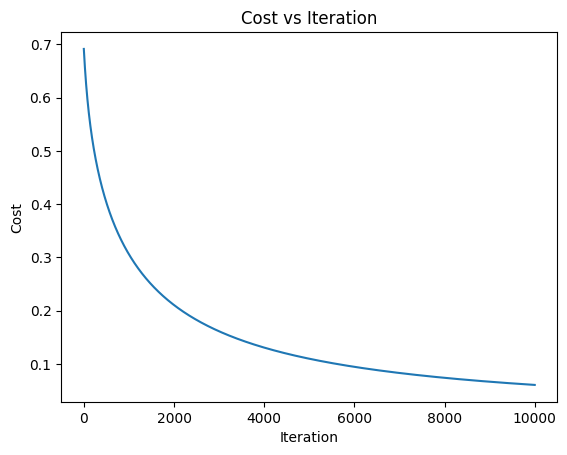

In [53]:
# Plot graph of cost vs iteration
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

# Model Performance Evaluation

In [55]:
from sklearn.metrics import accuracy_score as acc_score, precision_score as prec_score, recall_score as rec_score, f1_score as f1

# Function to make predictions
def custom_predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    h = compute_sigmoid(z)
    return (h >= 0.5).astype(int)

# Make predictions on training data
train_predictions = custom_predict(X_train_arrays, w_out, b_out)

# Make predictions on test data
test_predictions = custom_predict(X_test_arrays, w_out, b_out)

# Print metrics for training data
print("Metrics on Training Data:")

print(f"Accuracy: {acc_score(Y_train, train_predictions)*100}")
print(f"Precision: {prec_score(Y_train, train_predictions)}")
print(f"Recall: {rec_score(Y_train, train_predictions)}")
print(f"F1 Score: {f1(Y_train, train_predictions)}")

# Print metrics for test data
print("\nMetrics on Test Data:")
print(f"Accuracy: {acc_score(Y_test, test_predictions)*100}")
print(f"Precision: {prec_score(Y_test, test_predictions)}")
print(f"Recall: {rec_score(Y_test, test_predictions)}")
print(f"F1 Score: {f1(Y_test, test_predictions)}")


Metrics on Training Data:
Accuracy: 100.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Metrics on Test Data:
Accuracy: 70.0
Precision: 0.6597938144329897
Recall: 0.7032967032967034
F1 Score: 0.6808510638297872


In [56]:
m,_ = X_train_array.shape
# Initialize arrays to store predictions and original labels
y_train_prediction = np.zeros(m)
Y_train_original = np.zeros(m)

for i in range(m):
    y_train_prediction[i] = sigmoid(np.dot(X_train_array[i], w_out) + b_out)
    
    # Use iloc to access elements by position
    Y_train_original[i] = Y_train.iloc[i]
    
    if y_train_prediction[i] >= 0.5:
        y_train_prediction[i] = 1
    else:
        y_train_prediction[i] = 0


C:\Users\babul\AppData\Local\Temp\ipykernel_12748\3452714354.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train_prediction[i] = sigmoid(np.dot(X_train_array[i], w_out) + b_out)


In [57]:
for i in range(m):
    print("Prediction on Train :",y_train_prediction[i],"  ","Original Train ",Y_train_original[i])

Prediction on Train : 0.0    Original Train  0.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 0.0    Original Train  0.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 0.0    Original Train  0.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 0.0    Original Train  0.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 0.0    Original Train  0.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 0.0    Original Train  0.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train : 1.0    Original Train  1.0
Prediction on Train 